<a href="https://colab.research.google.com/github/minahilsiddiqui5/Practicing_MachineLearning/blob/main/PlacementProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.dtypes

Unnamed: 0      int64
cgpa          float64
iq            float64
placement       int64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [8]:
df['placement'].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [9]:
df['cgpa'].value_counts()

cgpa
4.9    6
5.2    5
6.1    5
7.0    5
6.0    5
6.8    4
7.3    4
6.5    4
5.7    4
4.8    4
5.4    4
6.3    3
7.5    3
4.7    3
5.0    3
6.9    3
5.1    3
6.4    2
5.3    2
5.8    2
6.7    2
7.1    2
8.1    2
4.4    2
7.6    2
6.6    2
4.0    2
8.0    1
4.3    1
8.5    1
7.4    1
4.6    1
7.8    1
8.3    1
3.5    1
3.3    1
3.9    1
5.9    1
6.2    1
Name: count, dtype: int64

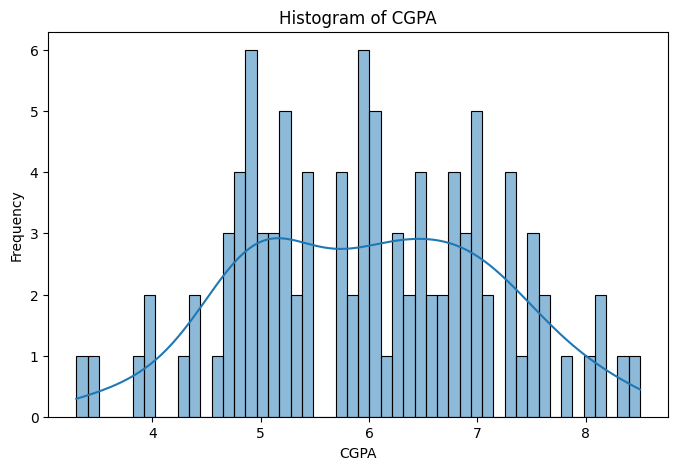

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['cgpa'],bins=50,kde=True)
plt.title("Histogram of CGPA")
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

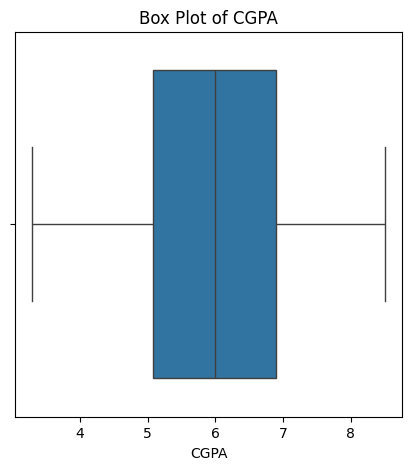

In [11]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df['cgpa'])
plt.title('Box Plot of CGPA')
plt.xlabel('CGPA')
plt.show()

<ipython-input-12-e81907183e9b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cgpa'], shade=True);


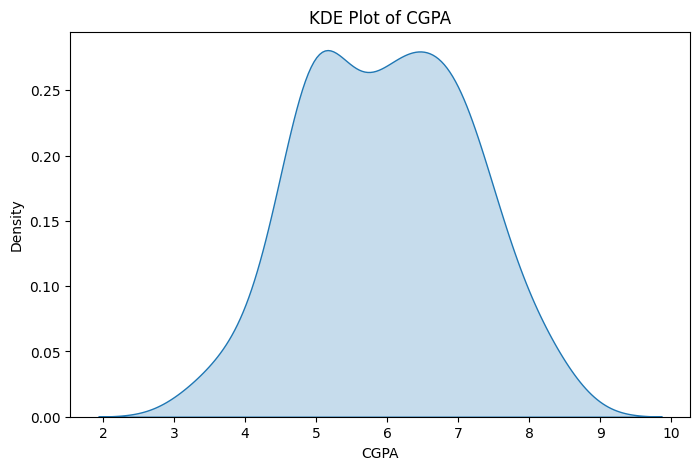

In [12]:
 # KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(df['cgpa'], shade=True);
plt.title('KDE Plot of CGPA')
plt.xlabel('CGPA')
plt.show()

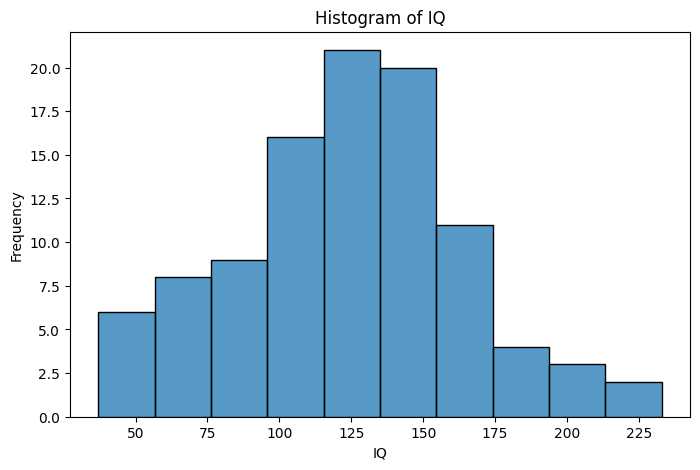

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['iq'],bins=10)
plt.title("Histogram of IQ")
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.show()

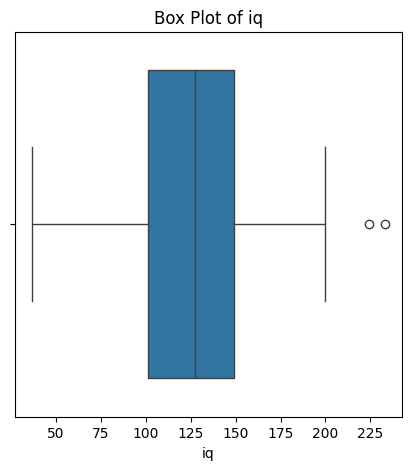

In [14]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df['iq'])
plt.title('Box Plot of iq')
plt.xlabel('iq')
plt.show()

<ipython-input-15-bf78dbcad682>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['iq'], shade=True);


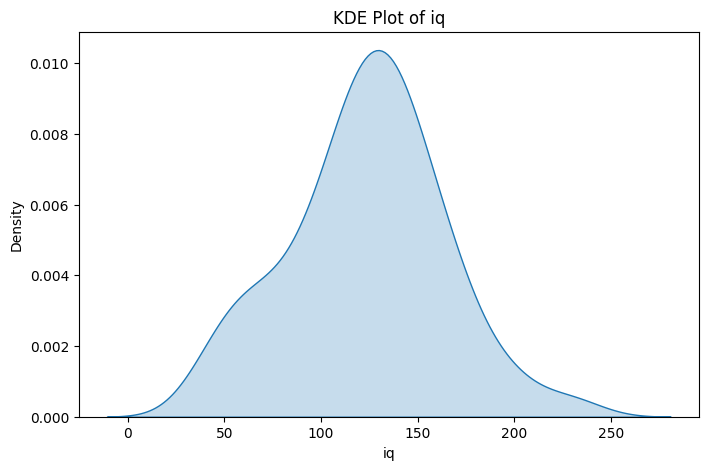

In [15]:
# KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(df['iq'], shade=True);
plt.title('KDE Plot of iq')
plt.xlabel('iq')
plt.show()

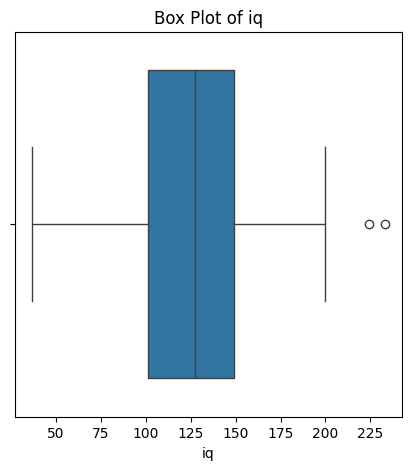

In [16]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df['iq'])
plt.title('Box Plot of iq')
plt.xlabel('iq')
plt.show()

In [17]:
df['iq'].value_counts()

iq
132.0    4
114.0    3
141.0    3
112.0    3
90.0     3
        ..
106.0    1
89.0     1
161.0    1
135.0    1
113.0    1
Name: count, Length: 71, dtype: int64

In [18]:
df = df.iloc[:,1:]


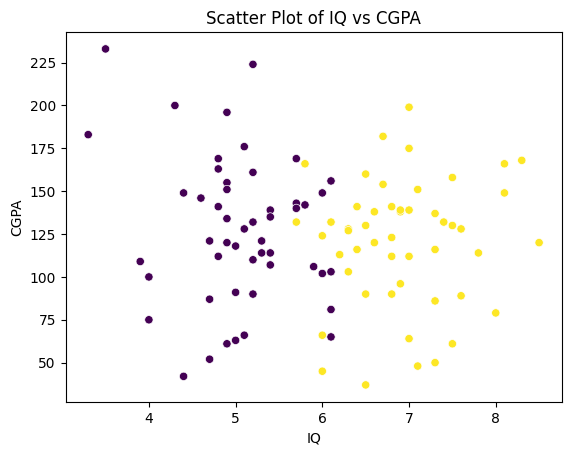

In [19]:
# Plot scatter plot
sns.scatterplot(data=df, x='cgpa', y='iq', c = df['placement'])
plt.title('Scatter Plot of IQ vs CGPA')
plt.xlabel('IQ')
plt.ylabel('CGPA')
plt.show()

Train Test Split

In [20]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [21]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [22]:
y.shape

(100,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train a model

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Evaluate the model

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_test

0     1
78    0
19    0
67    0
64    1
50    0
4     0
69    1
71    1
53    1
29    1
20    1
93    1
8     0
38    1
92    0
14    0
32    1
94    0
88    0
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


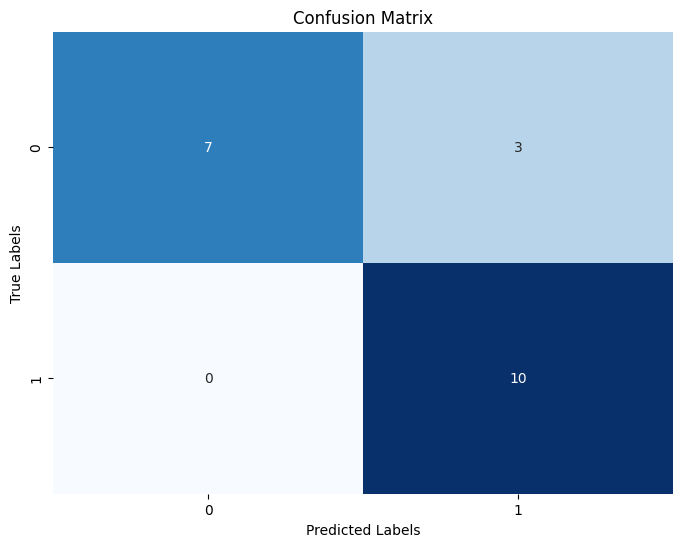

In [29]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

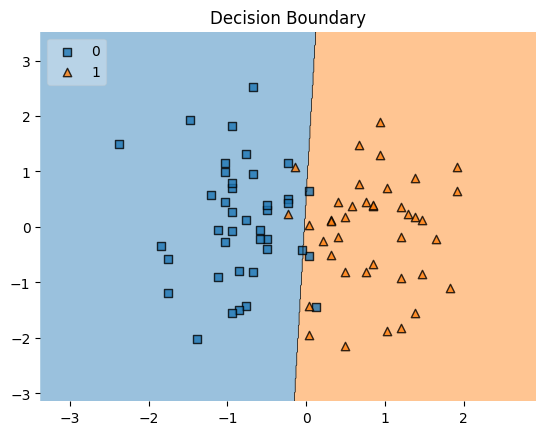

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=model, legend=2)
plt.title('Decision Boundary')
plt.show()